In [3]:
import cv2
import numpy as np
from openvino.inference_engine import IECore
from pathlib import Path
import os
from matplotlib import pyplot as plt


In [42]:
labels = [
    "road",
    "sidewalk",
    "building",
    "wall",
    "fence",
    "pole",
    "traffic_light",
    "traffic_sign",
    "vegetation",
    "terrain",
    "sky",
    "person",
    "rider",
    "car",
    "truck",
    "bus",
    "train",
    "motorcycle",
    "bicycle",
    "ego-vehicle",
]

In [ ]:
(249, 65, 68)
(243, 114, 44)
(248, 150, 30)
(249, 199, 79)
(249, 199, 79)
(144, 190, 109)
(67, 170, 139)
(87, 117, 144)
(47, 72, 88)
(51, 101, 138)
(134, 187, 216)
(247, 37, 133)
(114, 9, 183)
(67, 97, 238)
(217, 237, 146)
(118, 200, 147)
(22, 138, 173)
(100, 12, 24)
(150,200,90)
(10, 13, 156)

In [120]:
color_label[labels[i]]

(156, 13, 30)

In [144]:
import cv2
import numpy as np

classes = {
    0:{
        "label" : "road",
        "color":(249, 65, 68),
        },
    1:{
        "label" : "sidewalk",
        "color":(243, 114, 44),
        },
    2:{
        "label" : "building",
        "color":(248, 150, 30),
        },
    3:{
        "label" : "wall",
        "color":(249, 199, 79),
        },
    4:{
        "label" : "fence",
        "color":(199, 199, 79),
        },
    5:{
        "label" : "pole",
        "color":(144, 190, 109),
        },
    6:{
        "label" : "traffic_light",
        "color":(67, 170, 139),
        },
    7:{
        "label" : "traffic_sign",
        "color":(87, 117, 144),
        },
    8:{
        "label" : "vegetation",
        "color":(47, 72, 88),
        },
    9:{
        "label" : "terrain",
        "color":(51, 101, 138),
        },
    10:{
        "label" : "sky",
        "color":(134, 187, 216),
        },
    11:{
        "label" : "person",
        "color":(247, 37, 133),
        },
    12:{
        "label" : "rider",
        "color":(114, 9, 183),
        },
    13:{
        "label" : "car",
        "color":(67, 97, 238),
        },
    14:{
        "label" : "truck",
        "color":(217, 237, 146),
        },
    15:{
        "label" : "bus",
        "color":(3, 4, 94),
        },
    16:{
        "label" : "train",
        "color":(255, 114, 60),
        },
    17:{
        "label" : "motorcycle",
        "color":(2, 62, 138),
        },
    18:{
        "label" : "bicycle",
        "color":(0, 150, 199),
    },
    19:{
        "label" : "ego-vehic",
        "color":(72, 202, 228),
    },
}


def generate_legend(classes):
    num_classes = len(classes)
    legend = np.ones((num_classes*50,300,3),dtype=np.uint8)*255
    for i in list(classes.keys()):
        legend[50*i:50*(i+1),:50,:]=classes[i]["color"]
        legend = cv2.putText(
            img=legend,
            text=classes[i]["label"],
            org=(60,35+(50*i)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 0.8,
            color=(10,10,10),
            thickness=2,
            lineType=cv2.LINE_AA)
    return legend

        

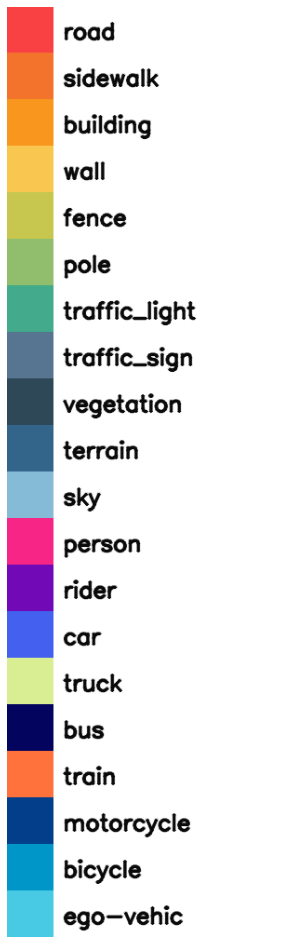

In [145]:
plt.figure(figsize=(5,20))
plt.imshow(generate_legend(classes))
plt.axis("off")
plt.show()

In [146]:
def display_labels(color_label):
    label_sample = dict()
    fig,axes = plt.subplots(nrows=1,ncols=len(color_label),figsize=(len(color_label),10))
    for i,label in enumerate(list(color_label.keys())):
        sample = np.ones((10,100,3),dtype=np.uint8)*color_label[label]
        axes[i].imshow(sample)
        axes[i].axis("off")
        axes[i].set_title(label)
        axes[i].axis("off")
    plt.show()

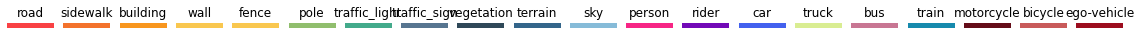

In [69]:
display_labels(color_label)

In [70]:
ie = IECore()

# Reading the saved model xml/bin files

net = ie.read_network(
    model="semantic-segmentation-adas-0001.xml",
    weights="semantic-segmentation-adas-0001.bin",
)

# Reshaping the input (xml/bin model is saved with a fixed input shape)


# Loading the network in memory
exec_net = ie.load_network(network=net, device_name="CPU")

In [104]:
image_path = "/Users/yelkhattabi/Desktop/entre-de-ville-bd-de-gaulle.png"

In [105]:
image = cv2.imread(image_path)

In [106]:
imh,imw,_ = image.shape

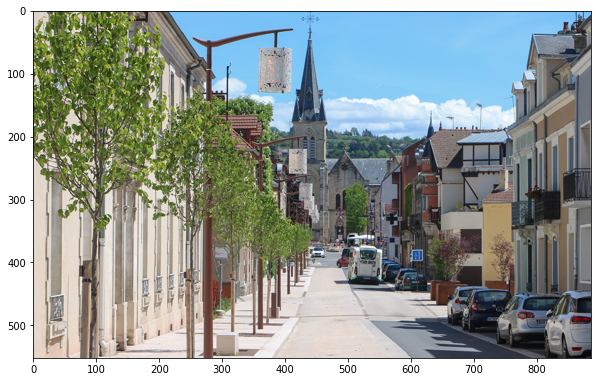

In [107]:
plt.figure(figsize=(10,10))
plt.imshow(image[...,::-1])
plt.show()

In [108]:
input_name = list(net.input_info.keys())[0]

In [109]:
_, _, H, W = net.input_info[input_name].tensor_desc.dims
        
# Convert image to colour if it is gray
if len(image.shape) == 2 or (
    len(image.shape) == 3 and image.shape[-1] == 1
):
    image = cv2.cvtColor(image.squeeze(), cv2.COLOR_GRAY2BGR)
# Convert image to the size of the input layer of the model


input_image_bgr = image
input_image_bgr = cv2.resize(input_image_bgr, (W,H), cv2.INTER_CUBIC)
input_image_bgr = np.moveaxis(input_image_bgr, -1, 0)  # openvino works with (n, c, h, w) format
input_image_bgr = np.expand_dims(input_image_bgr,0)

In [110]:
result_bgr = exec_net.infer(inputs={input_name: input_image_bgr})


In [149]:
list(exec_net.outputs

dict_keys(['4657.1'])

In [111]:
output_name = list(result_bgr.keys())[0]

In [112]:
result_bgr[output_name][0][0]

array([[ 2,  2,  2, ..., 10, 10, 10],
       [ 2,  2,  2, ..., 10, 10, 10],
       [ 2,  2,  2, ..., 10, 10, 10],
       ...,
       [ 2,  2,  2, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  0,  0,  0]], dtype=int32)

In [113]:
mask_u_bgr = np.zeros((H,W,3),dtype=np.uint8)

for i in range(len(labels)):
    mask_u_bgr[result_bgr[output_name][0,0] == i] = color_label[labels[i]]

mask_u_bgr = cv2.resize(mask_u_bgr,((imw,imh)))

overlay_bgr = cv2.addWeighted(image,0.7,mask_u_bgr,0.3,0)

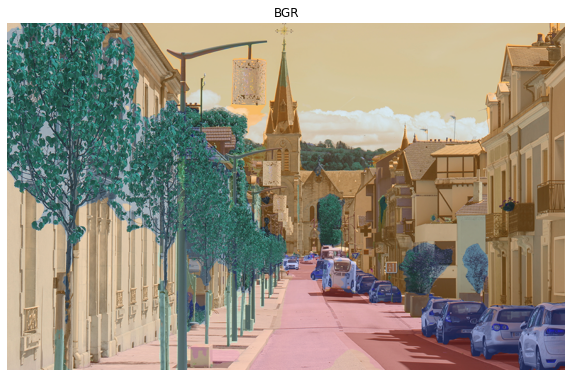

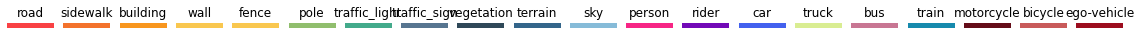

In [114]:
plt.figure(figsize=(10,10))
plt.imshow(overlay_bgr)
plt.title("BGR")
plt.axis("off")
plt.show()
display_labels(color_label)


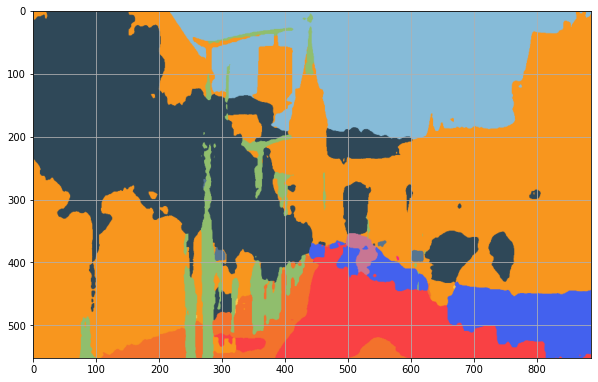

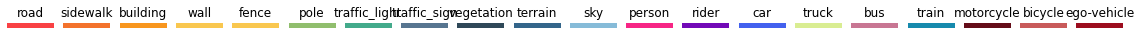

In [115]:
plt.figure(figsize=(10,10))
plt.imshow(mask_u_bgr)
plt.grid("off")
plt.show()
display_labels(color_label)